In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import DataFrame
import operator
import matplotlib.cm as cm
import math

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)

X_after, test_daily = train_test_split(x, test_size=0.2, random_state=123)
# test.to_csv(r'data_test_daily_c.csv', index = False, header=True)

X_after, test = train_test_split(X_after, test_size=0.125, random_state=123)
# test.to_csv(r'data_test_final_c.csv', index = False, header=True)

colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
X_after.head()

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
14832,37.584848,127.094023,0.004870,0.014913,0.020870,0.300000,46.652174,13.260870
5935,37.504547,126.994458,0.003083,0.035292,0.007167,0.520833,51.666667,39.125000
7379,37.658774,127.068505,0.005133,0.043467,0.004600,0.853333,31.066667,25.133333
11247,37.609823,126.934848,0.004083,0.029042,0.019375,0.745833,32.291667,18.458333
11104,37.609823,126.934848,0.002412,0.012471,0.045000,0.335294,25.705882,11.647059


In [4]:
class K_means(object):

    def train(self, data, k, verbose=0):

        shape = data.shape
        
        #initialize new array of zero untuk centroid
        ranges = np.zeros((shape[1], 5))
        centroids = np.zeros((shape[1], 5))

        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])

        if verbose == 1:
            print('Ranges: ')
            print(ranges)

        #change array centroid shape sesuai cluster
        centroids = np.zeros((k, shape[1]))
        for i in range(k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)

        if verbose == 1:
            print('Centroids: ')
            print(centroids)

            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()

        count = 0
        while True:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)

            #hitung jarak
            distances = np.zeros((shape[0],k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))

            #assign ke centroid terdekat
            labels = np.argmin(distances, axis = 1)

            #calculate posisi centroid baru
            new_centroids = np.zeros((k, shape[1]))
            for centroid in range(k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])

            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()

            #Cek apakah perbedaan posisi centroid sudah lebih kecil dari epsilon
            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()
                break

        #Move centroid ke titik baru
            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1

    def getAverageDistance(self, data):

        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = math.sqrt(dist)
        return dists

    def getLabels(self):
        return self.labels

In [5]:
x2 = X_after[['Longitude','Latitude', 'O3','SO2', 'NO2']].copy()
x2.head()

,Longitude,Latitude,O3,SO2,NO2
14832,127.094023,37.584848,0.020870,0.004870,0.014913
5935,126.994458,37.504547,0.007167,0.003083,0.035292
7379,127.068505,37.658774,0.004600,0.005133,0.043467
11247,126.934848,37.609823,0.019375,0.004083,0.029042
11104,126.934848,37.609823,0.045000,0.002412,0.012471


In [6]:
x_array = np.array(x2)
x_array

array([[1.27094023e+02, 3.75848485e+01, 2.08695652e-02, 4.86956522e-03,
        1.49130435e-02],
       [1.26994458e+02, 3.75045471e+01, 7.16666667e-03, 3.08333333e-03,
        3.52916667e-02],
       [1.27068505e+02, 3.76587743e+01, 4.60000000e-03, 5.13333333e-03,
        4.34666667e-02],
       ...,
       [1.27011952e+02, 3.76479299e+01, 3.43043478e-02, 3.47826087e-03,
        7.47826087e-03],
       [1.26949679e+02, 3.75937421e+01, 2.08947368e-02, 2.63157895e-03,
        2.03157895e-02],
       [1.27027279e+02, 3.76067189e+01, 2.52500000e-02, 4.91666667e-03,
        1.61666667e-02]])

DONE!


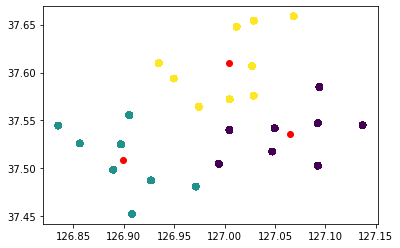

1

In [7]:
clf = K_means()
clf.train(x_array,3)

DONE!


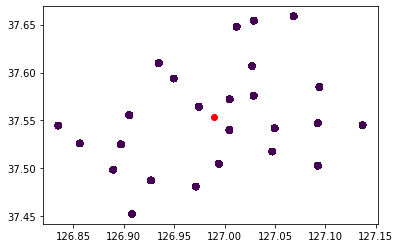

DONE!


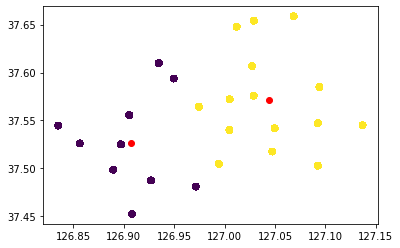

DONE!


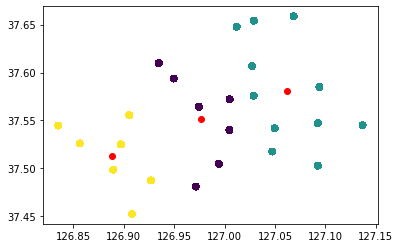

DONE!


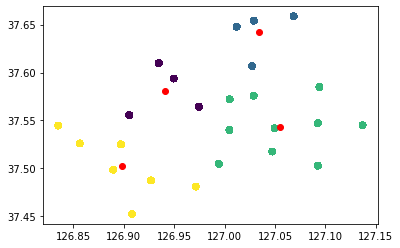

DONE!


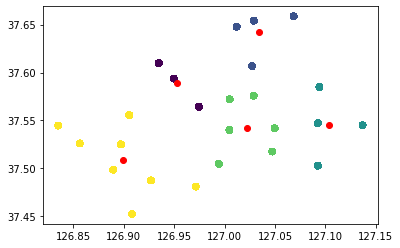

DONE!


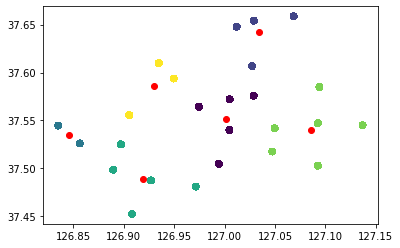

DONE!


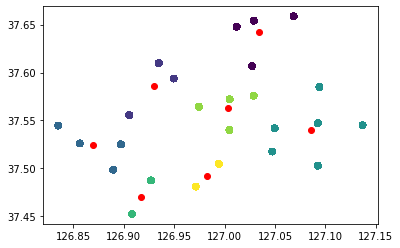

DONE!


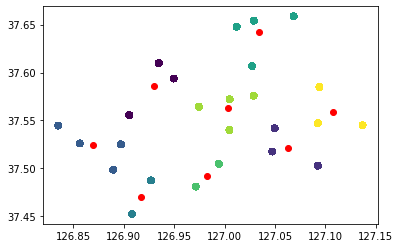

DONE!


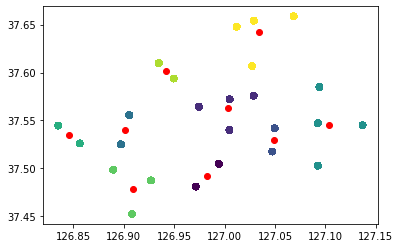

[array([40.7638566]), array([20.93392084, 26.75789274]), array([15.89768696, 22.82075231, 15.20025063]), array([10.16411722,  9.8997066 , 19.59680427, 16.06036952]), array([ 7.79916357,  9.8997066 , 10.43178651, 12.72275972, 17.21388092]), array([11.12718071,  9.8997066 ,  5.62472357, 12.07488957, 13.61111443,
        8.34562058]), array([ 9.8997066 ,  8.34562058,  9.85035044, 13.61111443,  6.22023917,
        9.07980104,  5.79371514]), array([8.34562058, 8.1814728 , 9.85035044, 6.22023917, 9.8997066 ,
       5.79371514, 9.07980104, 8.33027824]), array([ 5.79371514,  9.07980104,  5.3566711 ,  5.73406172, 10.43178651,
        5.62472357,  8.08581302,  5.07080349,  9.8997066 ]), array([ 5.79371514,  9.07980104,  5.3566711 ,  5.73406172, 10.43178651,
        5.62472357,  8.08581302,  5.07080349,  9.8997066 ])]


In [8]:
list_distance = []
for x in range(1,11):
    clf.train(x_array,x)
    list_distance.append(clf.getAverageDistance(x_array)) 
    
print(list_distance)

In [9]:
list_distance2 = []
for x in range (0,len(list_distance)):
    if len(list_distance[x]) > 1:
        avg = sum(list_distance[x]) / len(list_distance[x]) 
        list_distance2.append(avg)
    else:
        avg = sum(list_distance[x])
        list_distance2.append(avg)
print(list_distance2)

[40.7638565999706, 23.84590679043435, 17.97289662981994, 13.930249404825231, 11.61345946444823, 10.11387257849586, 8.971506773872862, 8.212648003038241, 7.230786909733703, 7.230786909733703]


<function matplotlib.pyplot.show(*args, **kw)>

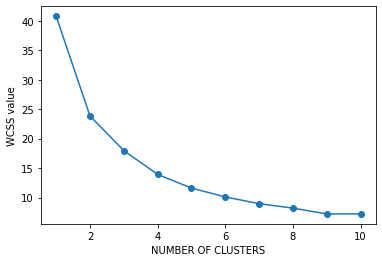

In [10]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters,list_distance2, marker='o')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS value')
plt.show

Analisa : 
1.
2.

In [15]:
x3 = test_daily[['Longitude','Latitude', 'O3','SO2', 'NO2']].copy()
x3.head()

,Longitude,Latitude,O3,SO2,NO2
16882,127.047470,37.517528,0.021250,0.005583,0.033000
18203,126.889692,37.498498,0.035375,0.005833,0.013083
26116,126.835151,37.544640,0.029059,0.002000,0.012529
18198,126.889692,37.498498,0.040762,0.005143,0.012381
7615,127.049659,37.541864,0.010043,0.003391,0.010043


In [16]:
x_test = np.array(x3)
x_test

array([[1.27047470e+02, 3.75175282e+01, 2.12500000e-02, 5.58333333e-03,
        3.30000000e-02],
       [1.26889692e+02, 3.74984981e+01, 3.53750000e-02, 5.83333333e-03,
        1.30833333e-02],
       [1.26835151e+02, 3.75446400e+01, 2.90588235e-02, 2.00000000e-03,
        1.25294118e-02],
       ...,
       [1.27092509e+02, 3.75026857e+01, 2.07083333e-02, 2.41666667e-03,
        3.15833333e-02],
       [1.26974676e+02, 3.75642629e+01, 1.66666667e-02, 3.57142857e-03,
        4.64761905e-02],
       [1.26897370e+02, 3.75250065e+01, 2.33333333e-02, 4.75000000e-03,
        1.85833333e-02]])

DONE!


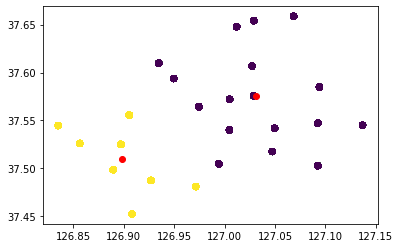

1

In [17]:
clf = K_means()
clf.train(x_test,2)